In [17]:
import scanpy as sc
import spapros as sp
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=300)

<Figure size 4500x3000 with 0 Axes>

<Figure size 4500x3000 with 0 Axes>

In [2]:
#sc.settings.verbosity = 0
sc.logging.print_header()
print(f"spapros=={sp.__version__}")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.4.3 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
spapros==0.1.0


In [3]:
adata = sc.read_h5ad("/scratch/nmq407/exp_04_labelled_h5ad")
adata

AnnData object with n_obs × n_vars = 143931 × 26479
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Index.10x', 'nCount_HTO', 'nFeature_HTO', 'Index.HTO', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'HTO_mcl_maxID', 'HTO_mcl_secondID', 'HTO_mcl_margin', 'HTO_mcl_classification', 'HTO_mcl_classification.global', 'hash.mcl.ID', 'doublet', 'predicted_dub_std', 'predicted_dub_cut', 'predicted_dub_all', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'strain', 'treatment', 'time', 'collection_date', 'isolation_date', 'batch', 'predicted.id', 'prediction.score.max', 'labels', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [4]:
adata_00 = adata[adata.obs_names, adata.var_names]
adata_00.obs['celltype'] = adata.obs['labels']
adata_00.obsm['X_umap'] = adata.obsm['UMAP'].to_numpy()
sc.pp.highly_variable_genes(adata_00,flavor="cell_ranger",n_top_genes=5000)
adata_00

/tmp/ipykernel_103106/1012691259.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_00.obs['celltype'] = adata.obs['labels']
/tools/anaconda/envs/nmq407/fgf1/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 143931 × 26479
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Index.10x', 'nCount_HTO', 'nFeature_HTO', 'Index.HTO', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'HTO_mcl_maxID', 'HTO_mcl_secondID', 'HTO_mcl_margin', 'HTO_mcl_classification', 'HTO_mcl_classification.global', 'hash.mcl.ID', 'doublet', 'predicted_dub_std', 'predicted_dub_cut', 'predicted_dub_all', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'strain', 'treatment', 'time', 'collection_date', 'isolation_date', 'batch', 'predicted.id', 'prediction.score.max', 'labels', 'ident', 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'X_name', 'hvg'
    obsm: 'PCA', 'UMAP', 'X_umap'
    layers: 'logcounts'

In [5]:
adata_00.obsm['X_umap']

array([[ 12.85843354,   5.30657367],
       [ -0.17842472,   9.77662352],
       [ 12.55509931,   4.74945764],
       ...,
       [ -9.01614398, -10.08599778],
       [-11.91787261,   4.76764087],
       [-12.33483428,  -8.29109689]])

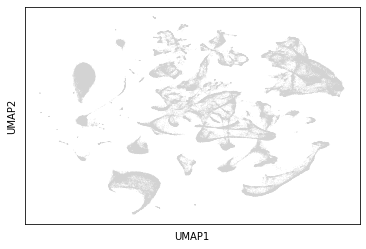

In [6]:
sc.pl.umap(adata_00)

In [7]:
selector = sp.se.ProbesetSelector(adata_00,
                                  n=100,
                                  celltype_key="labels",
                                  verbosity=1,
                                  save_dir='data/',
                                  n_jobs=40)

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 Endothelial      : 17
	 MOL-a2_Tanycytes : 9
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().
Searching for previous results in data/


In [ ]:
selector.select_probeset()

SPAPROS PROBESET SELECTION:                                                                      2:51:24
Select pca genes.......................................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:26
Train baseline forest based on DE genes................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━   3/4 2:50:54
  Select DE genes......................................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51/51 0:00:00
  Train prior forest for DE_baseline forest............... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:32:57
  Iteratively add DE genes to DE_baseline forest.......... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 2:07:07
  Train final baseline forest on all celltypes............ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0/3 0:07:35

In [11]:
selector.probeset

,gene_nr,selection,rank,marker_rank,tree_rank,importance_score,pca_score,pre_selected,prior_selected,pca_selected,celltypes_DE_1vsall,celltypes_DE_specific,celltypes_DE,celltypes_marker,list_only_ct_marker,required_marker,required_list_marker
Celf2,1,True,1.0,1.0,1.0,0.949427,0.760107,False,False,True,"Sst_Pthlh,Unassigned2-Rgs16_Vip",,"Sst_Pthlh,Unassigned2-Rgs16_Vip","Sst_Pthlh,Unassigned2-Rgs16_Vip",False,True,False
Col25a1,2,True,1.0,1.0,1.0,0.845663,1.146719,False,False,True,b2_Tany,,b2_Tany,b2_Tany,False,True,False
Cntnap2,3,True,1.0,1.0,1.0,0.745513,2.837688,False,False,True,Unassigned2,,Unassigned2,Unassigned2,False,True,False
Kcnd2,4,True,1.0,1.0,1.0,0.704840,2.276790,False,False,True,,"Ghrh,Kisspeptin","Ghrh,Kisspeptin","Ghrh,Kisspeptin",False,True,False
Qk,5,True,1.0,1.0,1.0,0.684050,0.692333,False,False,True,,"NG2_OPC2-Microglia,MOL","NG2_OPC2-Microglia,MOL","NG2_OPC2-Microglia,MOL",False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vmn2r40,4996,False,NaN,NaN,NaN,NaN,0.000004,False,False,False,,,,,False,False,False
Prl2b1,4997,False,NaN,NaN,NaN,NaN,0.000004,False,False,False,,,,,False,False,False
Gm21258,4998,False,NaN,NaN,NaN,NaN,0.000004,False,False,False,,,,,False,False,False
Cdsn,4999,False,NaN,NaN,NaN,NaN,0.000003,False,False,False,,,,,False,False,False


In [21]:
selected_set = selector.probeset.index[selector.probeset.selection]
selected_set

Index(['Celf2', 'Col25a1', 'Cntnap2', 'Kcnd2', 'Qk', 'Sgcz', 'Satb2', 'Gpc6',
       'Erbb4', 'Ust', 'Il1rapl2', 'Tnr', 'Opcml', 'Sfta3-ps', 'Il1rap',
       'Prkg1', 'Pcdh15', 'Lrrc4c', 'Slit2', 'Nkain2', 'Sgcd', 'Mir99ahg',
       'Rbfox1', 'Tenm2', 'Slc4a4', 'Ptprd', 'Nrxn3', 'Zfhx3', 'Dgkb',
       'Malat1', 'Nxph1', 'Grm7', 'Kcnip4', 'Pde4b', 'Trpm3', 'Cadm2', 'Lmx1a',
       'Fgf13', 'Cacna2d1', '9530026P05Rik', 'Plcl1', 'Lhfpl3', 'Cntn5',
       'Epha6', 'Efna5', 'Npas3', 'Lrp1b', 'Zbtb20', 'Pde4d', 'Grik2', 'Rorb',
       'Sntg1', 'Asic2', 'Sik3', 'Ank2', 'Syt1', 'Nlgn1', 'Robo1', 'Auts2',
       'Lsamp', 'Il1rapl1', 'Nrxn1', 'Magi2', 'Grm5', 'Pcdh9', 'Ntm', 'Pcdh7',
       'Ralyl', 'Lingo2', 'Gpc5', 'Car10', 'Lrfn5', 'Adcy2', 'Luzp2',
       'Galntl6', 'Ctnna2', 'Egfem1', 'Snhg11', 'Dpp10', 'Grid2', 'Csmd1',
       'Marchf1', 'Dlg2', 'Negr1', 'Nalf1', 'Ncam2', 'Dscam', 'Frmd4a',
       'Lrrtm4', 'Slit3', 'B3galt1', 'Nrg1', 'Gabrg3', 'Csmd3', 'Fgf14',
       'Mgat4c', 'ENSMUSG0

AttributeError: 'NoneType' object has no attribute 'set_size_inches'

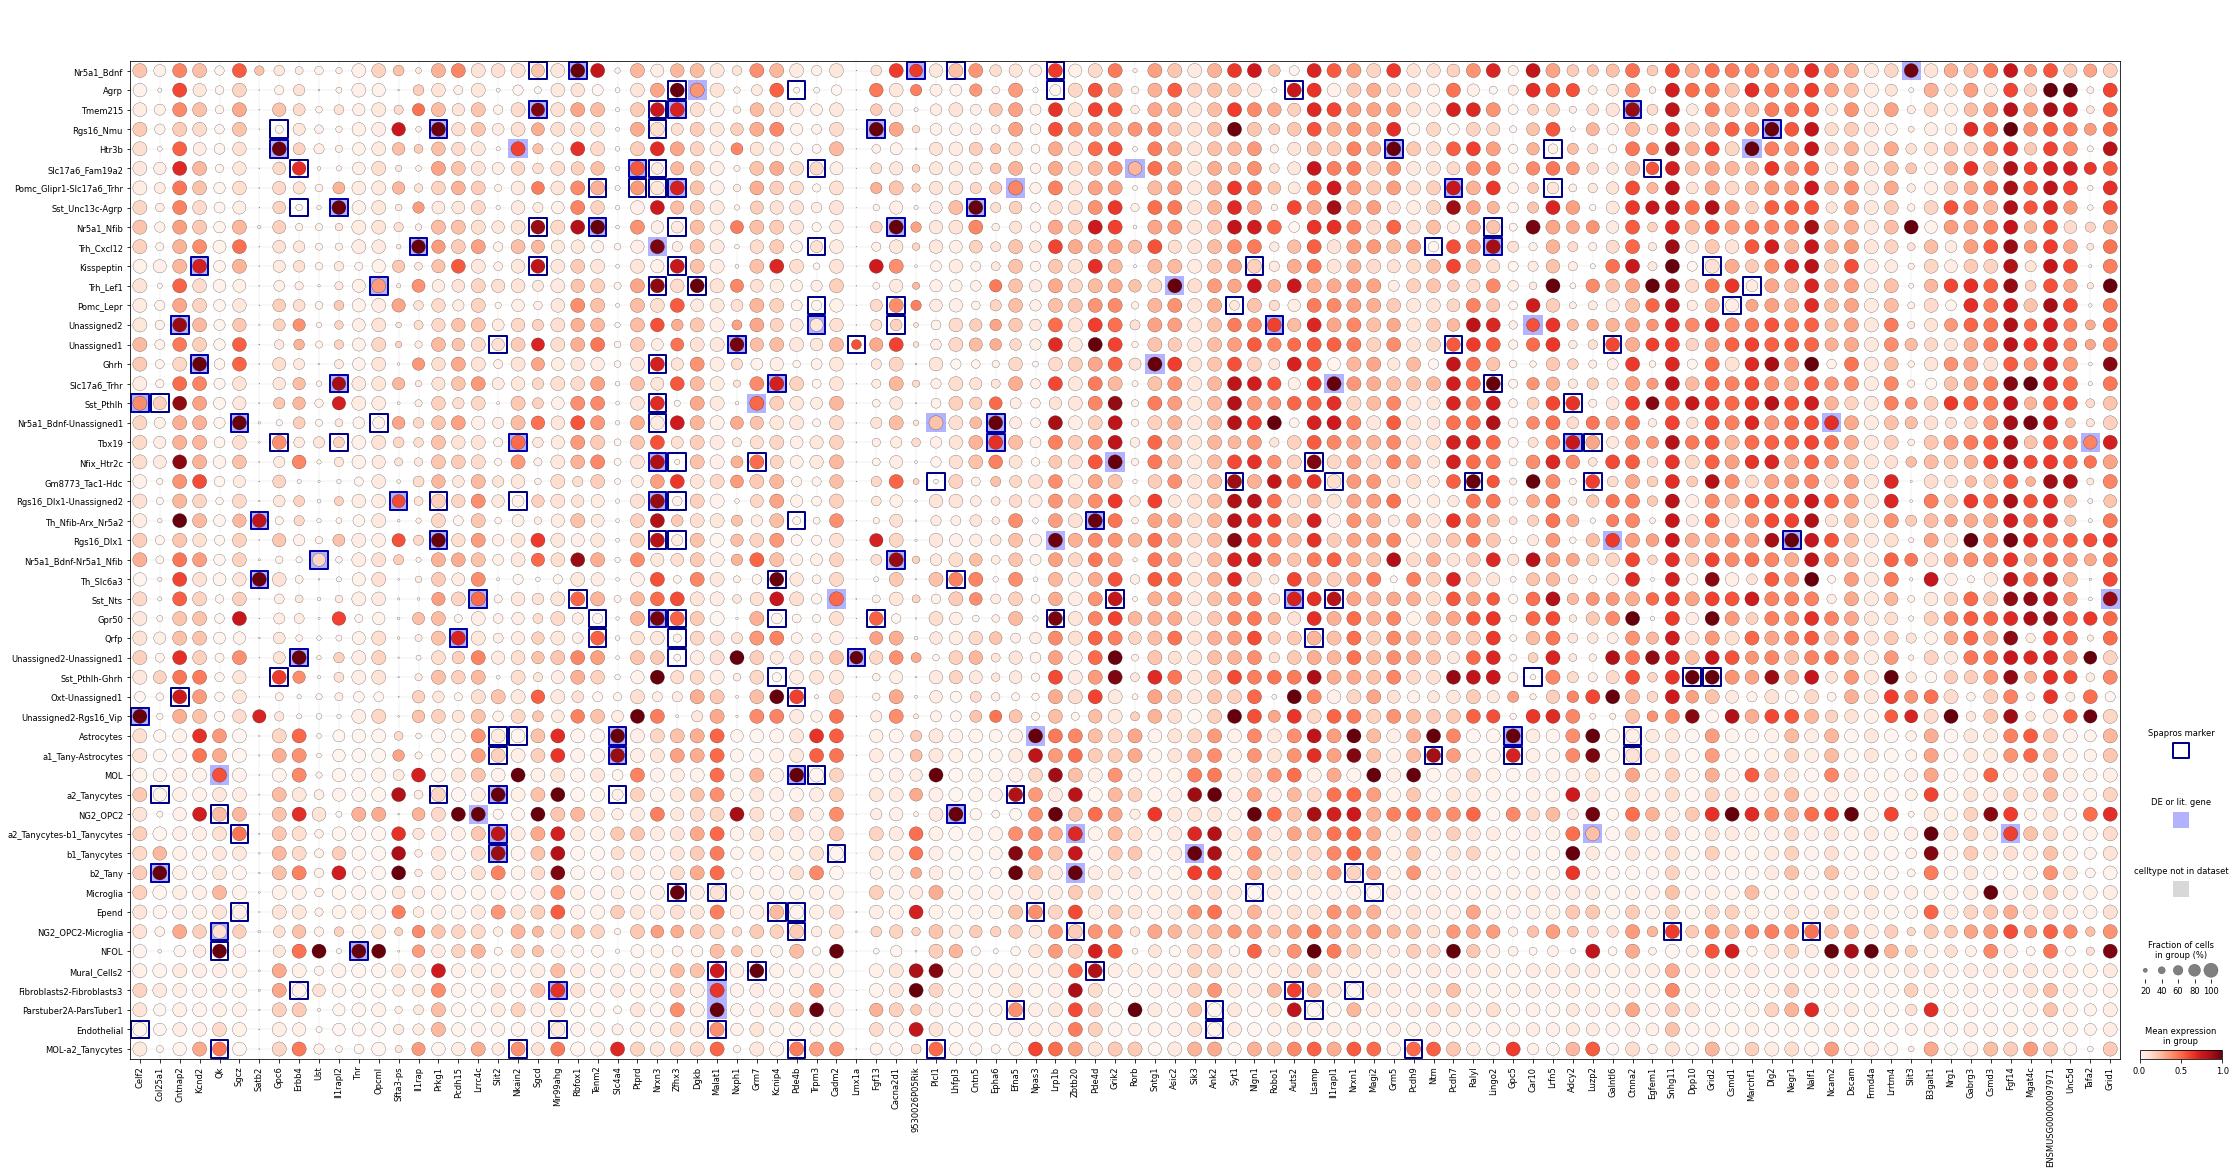

In [19]:
masked_dotplot = sp.pl.masked_dotplot(adata_00, selector)
masked_dotplot.set_size_inches(18.5, 10.5)
masked_dotplot

/tools/anaconda/envs/nmq407/fgf1/lib/python3.8/site-packages/spapros/plotting/plot.py:1250: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


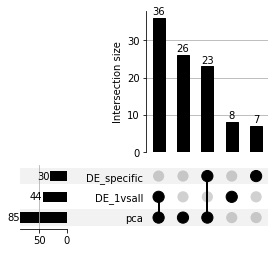

In [15]:
selector.plot_gene_overlap()

In [20]:
evaluator = sp.ev.ProbesetEvaluator(adata_00, verbosity=2, results_dir='evaluate')

In [22]:
evaluator.evaluate_probeset(selected_set, set_id="Spapros")

SPAPROS PROBESET EVALUATION:                                                                     1:22:57
Shared metric computations................................ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:55:53
  Computing shared compuations for knn_overlap............ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   6/6 0:23:39
  Computing shared compuations for gene_corr.............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:01:59
Probeset specific pre computations........................ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:26:47
  Computing pre compuations for knn_overlap............... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   6/6 0:26:36
Final probeset specific computations...................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0/3 0:00:17
  Computing final compuations for knn_overlap............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━   5/6 0:00:17

The following cell types are not included in forest classifications since they have fewer than 40 cells: 
['MOL-a2_Tanycytes']

AttributeError: 'Index' object has no attribute 'loc'

In [24]:
# Reference probesets
reference_sets = sp.se.select_reference_probesets(adata_00, n=20)

Reference probeset selection.............................. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   4/4 0:03:45
  Selecting PCA genes..................................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:28
  Selecting DE genes...................................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:03:11
  Selecting HVG genes..................................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:04
  Selecting random (seed=0) genes......................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:00
Finished

In [25]:
for set_id, df in reference_sets.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)


SPAPROS PROBESET EVALUATION:                                                                     0:46:28
Shared metric computations................................ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:08:39
  Loading shared computations for knn_overlap............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:01
  Loading shared computations for gene_corr............... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:08:38
Probeset specific pre computations........................ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:37:30
  Computing pre compuations for knn_overlap............... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   6/6 0:37:23
Final probeset specific computations...................... ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━   1/3 0:00:18
  Computing final compuations for knn_overlap............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   6/6 0:00:17
  Computing final compuations for forest_clfs............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  0/25 0:00:00

/tools/anaconda/envs/nmq407/fgf1/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in 
`fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor 
or`set_params` instead.
  warnings.warn(

ValueError: 2 different `eval_metric` are provided.  Use the one in constructor or `set_params` instead.